In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=27560cde4b19264a7b4dec982387814e205dc6fa6ffe16469a7caf3631fa7f33
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz
!rm creditcard.tar.gz

creditcard.csv


In [ ]:
!rm -r sample_data
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec
plt.rcParams['axes.grid'] = False
from scipy import stats
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture   # Representation of a Gaussian mixture model probability distribution
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
class_cnts = df.Class.value_counts()
class_cnts

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
class_cnts/sum(class_cnts)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
df.Amount.max()

25691.16

Let's figure out how many examples we have for each class.

* Percentage of entries in the dataset for each class?  
  * ***class 0 : 99.83%***
  * ***class 1 : 0.17%*** 
* **The data is unbalanced**, with only 0.17% of the examples being fraudulent transactions (class 1). Maybe this is the case because in reality, (luckily) fraudulent credit card transactions happen only a small amount of times compared to normal, healthy transactions. 



Next, I will split the dataset into a training (70%) and testing set (30%). 

In [ ]:
### Split the data  ###
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1, inplace=False), df.Class, test_size=0.3, random_state=0)
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


In [ ]:
X_train.V20.mean(), X_train.V20.std()

(0.0004302219382028674, 0.7702574561360888)

In [ ]:
norm = stats.norm(  # A normal continuous random variable
    loc = 0.0004302219382028674,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V20 ### 
    scale = 0.7702574561360888 ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V20 ### 
)

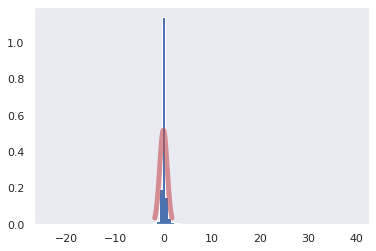

In [ ]:
var_name = 'V20'
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),  # ppf : percent point function
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()

We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

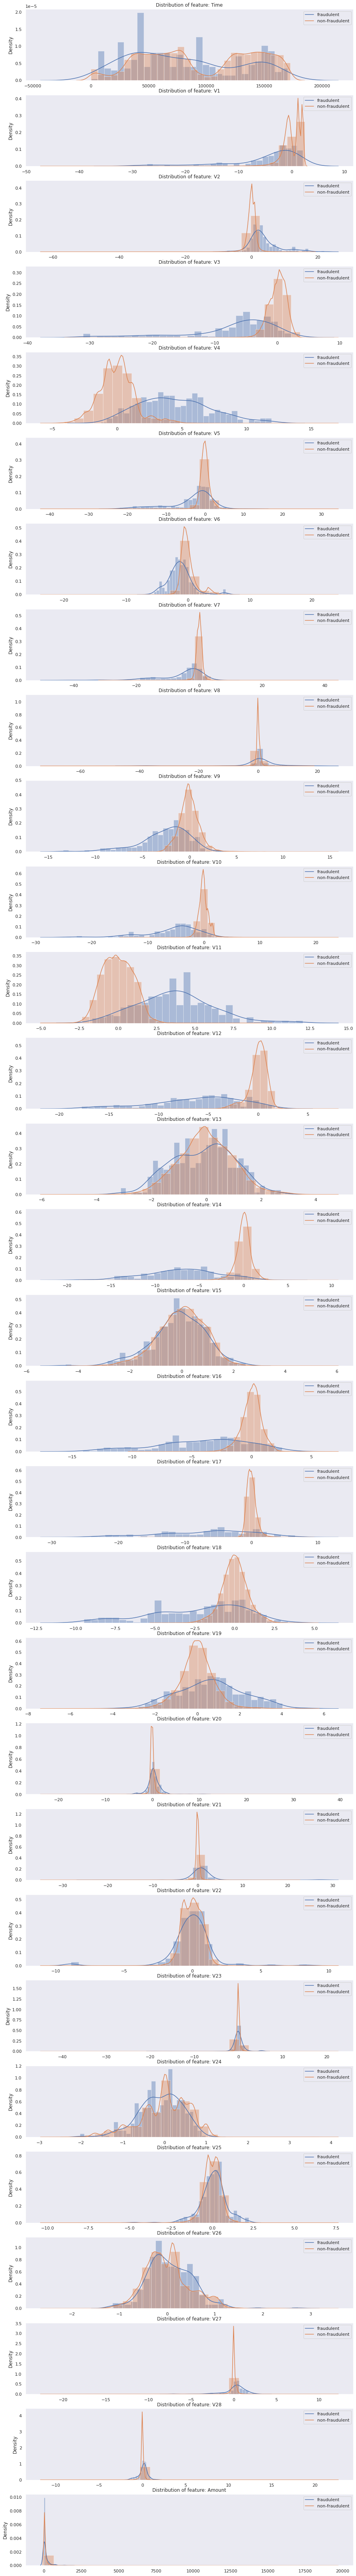

In [ ]:
features=[f for f in df.drop('Class', axis=1).columns]# if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0], bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)


* Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[1]**

These are very useful in visualizing the distrubutions of each feature's non-fraud and fraud cases. By looking at these plots, we can see how the distribution differ between the two classes, in terms of the mean (location of the curve) and variance (spread of the curve). The features whose graph seems to indicate not much difference between the negative class and positive class distributions (such as 'Time' and 'Amount' features above) can be eliminated from modelling anomaly detection, as they may not provide useful discriminative info between the two classes. We can even try to overlap these graphs into a single graph with the same scale, to see how many different Gaussian distributions exist within the whole dataset. 

## **Part 2: *Unsupervised,* One Gaussian** -- Single feature model with one Gaussian distribution
We'll start by making a prediction using **a single feature of our dataset at a time**. 

  * Fit a Gaussian distribution on a feature of **the full training dataset** (this is unsupervised learning, we don't use the labels) when ``n_components=1``. 
  * Compute AUC (Area under the ROC Curve) on the full training set (including both classes). 
  * Repeat the above steps for each of the features.
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. 
  *  To make a prediction based on a model's scores: If the ``score_samples`` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. It's worth noting that for this last step, we're now using class labels for the first time, and so this method could be considered semi-supervised. 



In [ ]:
auc_df_part2 = pd.DataFrame(index=['AUC'])
scores_df = pd.DataFrame()
for feat in X_train.columns:
    gm = GaussianMixture(n_components=1)
    gm.fit(np.array(X_train[feat]).reshape(-1, 1))  # fit gm model for a SINGLE feature
    
    # Compute scores based on how likely it is that a point of the current feature is generated by the same feature's distribution
    scores_gm = gm.score_samples(np.array(X_train[feat]).reshape(-1, 1))   

    # Compute Area Under the ROC Curve, with train labels & scores for the feature points 
    auc = roc_auc_score( y_train, 1-scores_gm )     
    
    auc_df_part2[feat] = auc
    scores_df[feat] = scores_gm

auc_df_part2.sort_values(by='AUC', axis=1, ascending=False).transpose()

,AUC
V14,0.952459
V17,0.934852
V12,0.920180
V10,0.913600
V16,0.902137
V11,0.897175
V4,0.892103
V3,0.876537
V7,0.862967
V2,0.837499


Looking at the sorted table above, the **best feature** to distinguish fraudulent transactions from non-fraudulent transactions based on AUC is the one with the highest **AUC value of ~0.9525** : **V14**.

From the table, the feature Time has low AUC (0.52, 4th from the bottom), which make sense because Time simply increases chronologically from the top to the bottom of the creditcard.csv, and thus should not have any relationship with the class labels.

Now, I will find the optimal threshold for **V14** feature that maximizes the F1 Score. 

In [ ]:
# min score, max score, and total number of scores
scores_df.V14.min(), scores_df.V14.max(), len(scores_df.V14)

(-202.46093899981875, -0.8749200833907277, 199364)

In [ ]:
f1_score_df = pd.DataFrame(index=['threshold', 'f1_score'])

for k in [10, 50, 100, 200, 225, 250, 275, 300, 310, 320, 330, 340, 350, 375, 400, 500, 600, 1000, 5000, 10000, 50000]:
  threshold_score = sorted(scores_df.V14)[k]
  f1_score_df[str(k)] = [threshold_score, f1_score(y_train, scores_df.V14 < threshold_score)]

f1_score_df

,10,50,100,200,225,250,275,300,310,320,330,340,350,375,400,500,600,1000,5000,10000,50000
threshold,-112.014210,-74.436648,-50.931742,-31.286722,-28.475337,-25.488146,-23.356983,-21.127138,-20.370199,-19.731028,-19.384281,-19.249098,-18.973713,-17.347127,-16.079730,-13.244936,-11.847824,-8.206138,-3.741333,-2.721138,-1.273759
f1_score,0.050704,0.217722,0.364045,0.539450,0.564912,0.578151,0.583871,0.610853,0.613740,0.610526,0.610370,0.603221,0.595683,0.594444,0.587919,0.560947,0.537566,0.411896,0.110384,0.058386,0.012831


Looking at the summary table above, the optimal threshold that yields the maximum F1 Score of **~0.6137** in the training set is around **-20.3702** (for k=310), using **V14** feature only.

## **Part 3: *Supervised,* One Gaussian** -- Single feature model with one Gaussian distribution
This part is similar to Part 2, but here we only fit a Gaussian distribution to the non-fraudulent transactions (and not all training data).

  * Fit a Gaussian distribution on a feature of **non-fraudulent transactions** when ``n_components=1``. 
  * Compute AUC (Area under the ROC Curve) on the full training set (including both classes).
  * Repeat the above steps for each of the features and present your findings in a table. 
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. 
  *  Find an optimal threshold that maximizes the F1 Score in the training set.
  *  Compare your results with Part 2 - does using a model based on the full dataset vs a model based only on non-fraudulent data make a big difference on performance?


In [ ]:
X_train_non_fraud = X_train[y_train==0]
auc_df_non_fraud = pd.DataFrame(index=['AUC'])
scores_df_non_fraud = pd.DataFrame()
for feat in X_train_non_fraud.columns:
    gm = GaussianMixture(n_components=1)
    gm.fit(np.array(X_train_non_fraud[feat]).reshape(-1, 1))  # fit gm model for a SINGLE feature
    
    # Compute scores based on how likely it is that a point of the current feature is generated by the same feature's distribution
    scores_gm = gm.score_samples(np.array(X_train[feat]).reshape(-1, 1))   

    # Compute Area Under the ROC Curve, with train labels & scores for the feature points 
    auc = roc_auc_score( y_train, 1-scores_gm )     
    
    auc_df_non_fraud[feat] = auc
    scores_df_non_fraud[feat] = scores_gm

auc_df_non_fraud.sort_values(by='AUC', axis=1, ascending=False).transpose()

,AUC
V14,0.952599
V17,0.934440
V12,0.920788
V10,0.913558
V16,0.902069
V11,0.897612
V4,0.892612
V3,0.877392
V7,0.863167
V2,0.838015


Looking at the sorted table above, the **best feature** to distinguish fraudulent transactions from non-fraudulent transactions based on AUC is the one with the highest **AUC value of ~0.9526** : **V14**. This is the same best feature as part 2, with 0.0001 higher AUC value than part 2.

Now, I will find the optimal threshold for **V14** feature that maximizes the F1 Score. 

In [ ]:
# min score, max score, and total number of scores
scores_df_non_fraud.V14.min(), scores_df_non_fraud.V14.max(), len(scores_df_non_fraud.V14)

(-230.01438895016636, -0.8113441003188453, 199364)

In [ ]:
f1_score_df_non_fraud = pd.DataFrame(index=['threshold', 'f1_score'])

for k in [10, 50, 100, 200, 225, 250, 275, 300, 310, 320, 330, 340, 350, 375, 400, 500, 600, 1000, 5000, 10000, 50000]:
  threshold_score = sorted(scores_df_non_fraud.V14)[k]
  f1_score_df_non_fraud[str(k)] = [threshold_score, f1_score(y_train, scores_df_non_fraud.V14 < threshold_score)]

f1_score_df_non_fraud

,10,50,100,200,225,250,275,300,310,320,330,340,350,375,400,500,600,1000,5000,10000,50000
threshold,-127.230906,-84.518908,-57.796945,-35.457056,-32.259255,-28.861183,-26.421250,-23.863695,-23.014111,-22.235784,-21.915492,-21.762691,-21.449322,-19.442874,-18.155846,-14.914083,-13.294292,-9.155554,-4.072711,-2.902225,-1.263734
f1_score,0.050704,0.217722,0.364045,0.539450,0.564912,0.578151,0.587097,0.610853,0.613740,0.613534,0.610370,0.603221,0.595683,0.594444,0.587919,0.560947,0.537566,0.413383,0.110384,0.058579,0.012831


Looking at the summary table above, the optimal threshold that yields the maximum F1 Score of **~0.6137** is around **-23.0141** (for k=310), using **V14** feature only.

This is the **same best feature and F1 score value from Part 2**, the unsupervised approach. I think such similarity occured because we are using only one feature at a time. There are only 345 out of 199364 training exampes are of positive class. Thus, the distribution of ALL 199364 training examples of a single feature and that of 199364-345=199019 negative examples of the same feature may not differ too much.

However, as we add more features to fit the Gaussian Mixture model (multivariate), the difference between unsupervised and supervised case will increase.

## **Part 4: *Supervised,* 2 Gaussians** -- Single feature model with 2 Gaussian distributions. 
Now I will use two separate distributions for fraudulent and non-fraudulent transactions.
  *  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions**. I will use the feature that lead to the best AUC in Part 3. **[0.5]**
  * Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions**.
  * Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **whole training** set to get $S_1$ and $S_2$, respectively.
  * Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. E.g. if **$c=1$** : if $S_2$ > $S_1$, the transaction is a **fraud** (i.e. transaction belongs to $G_2$ distribution which represents fraudulent transactions). 
  * Repeat the steps above for at least 2 other features. 

In [ ]:
def find_optimal_c(feature, n_components=1):
    ''' 1. Fit GM1 on a feature of NON-FRAUDULENT transactions (y_train = 0) '''
    X_train_non_fraud = X_train[y_train==0]
    G1 = GaussianMixture(n_components=n_components)
    if type(feature) == str:  # if only one feature was passed
        G1.fit(np.array(X_train_non_fraud[feature]).reshape(-1, 1))  # fit gm model for a SINGLE feature
    else:
        G1.fit(X_train_non_fraud[feature])

    ''' 2. Fit GM2 on a feature of FRAUDULENT transactions (y_train = 1) ''' 
    X_train_fraud = X_train[y_train==1]
    G2 = GaussianMixture(n_components=n_components)
    if type(feature) == str:
        G2.fit(np.array(X_train_fraud[feature]).reshape(-1, 1))
    else:
        G2.fit(X_train_non_fraud[feature])

    ''' 3. Compute SCORES for both GM1&GM2 on ENIRE training set '''
    if type(feature) == str:
        S1 = G1.score_samples(np.array(X_train[feature]).reshape(-1, 1))   # log probs of each feature point belonging to NON-FRAUD cases
        S2 = G2.score_samples(np.array(X_train[feature]).reshape(-1, 1))   # log probs of each feature point belonging to FRAUD cases
    else:
        S1 = G1.score_samples(X_train[feature])   
        S2 = G2.score_samples(X_train[feature])

    ''' 4. Find and return the optimal c value ''' 
    min_c, max_c = min(S1/S2), max(S1/S2)                              # if a point's P(not fraud) < c*P(fraud), classify as fraud
    if max_c > min_c:  # if this condition is not met, disregard the feature
        c_values = []
        f1_scores = []
        for c in np.linspace(min_c, max_c, 100):
            c_values.append(c)
            f1_scores.append(f1_score(y_train, S1 < c*S2))

        return c_values[np.argmax(f1_scores)], max(f1_scores)

In [ ]:
find_optimal_c('V14')

(9.60537422478979, 0.6333853354134166)

With **V14 feature only**, the **optimal c** is **9.6054**, with the best F1-score of **0.6334**.

In [ ]:
f1_score_dict = {}	
max_f1_score=0
for feature in X_train.columns: 
    try:
        optimal_c, best_f1_score = find_optimal_c(feature)
        f1_score_dict[feature] = (optimal_c, best_f1_score)
        if best_f1_score > max_f1_score:
          max_f1_score=best_f1_score
          best_feature = feature
          best_c = optimal_c
    except:
      print("{} not considered.".format(feature))
best_feature, max_f1_score, best_c

('V12', 0.6857142857142857, 5.075177702063895)

So it seems like the best feature for this method is actually **V12**, with the highest F1-score of **0.6857** and **c = 5.0752**. 

It's a big improvement from part 3, in which the highest F1-score of 0.6137.

## **Part 5: Multivariate and Mixture of Gaussians Distribution** 
I will now build an outlier detection model that performs well in terms of **F1 score**. 



Before trying different models, I will first **scale** X_train using sklearn's StandardScaler().

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train[X_train.columns] = scaler.transform(X_train)

I would also like to compare each feature's mean/variance difference and AUC results from Part 2, to see if there is any relationship.

In [ ]:
stats_df = pd.DataFrame(index=['total_variance',
                               'mean_square_diff',
                               'var_diff', 
                               'unsupervised_AUC'])
for f in X_train.columns:
  stats_df[f] = [X_train[f].var(),
                 (X_train[y_train==0][f].mean()-X_train[y_train==1][f].mean())**2,
                 X_train[y_train==1][f].var()-X_train[y_train==0][f].var(),
                 auc_df_part2[f][0]]

stats_df.round(decimals=4).sort_values(by='unsupervised_AUC', axis=1, ascending=False)

,V14,V17,V12,V10,V16,V11,V4,V3,V7,V2,V27,V21,V28,V18,V9,V8,V5,V19,V20,V6,V1,V23,Amount,V25,V13,V22,V15,Time,V26,V24
total_variance,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
mean_square_diff,51.7944,62.1659,37.4075,26.6679,21.8542,13.3594,10.0612,22.2107,21.6873,5.0711,0.0464,1.4980,0.0821,7.4076,5.5162,0.2090,6.1320,0.6499,0.1997,1.0247,6.5136,0.0042,0.0312,0.0125,0.0129,0.0110,0.0167,0.0951,0.0148,0.0231
var_diff,17.3455,67.3198,18.8799,19.3183,18.0004,4.9853,2.8300,22.3501,37.1337,6.4524,12.5161,34.5689,1.6783,11.2532,4.6112,39.3222,16.1911,2.7040,2.6331,1.1749,12.4734,6.9500,0.0813,1.3987,0.2611,4.2982,0.2776,-0.0135,-0.0114,-0.3010
unsupervised_AUC,0.9525,0.9349,0.9202,0.9136,0.9021,0.8972,0.8921,0.8765,0.8630,0.8375,0.8355,0.8335,0.8142,0.8080,0.8029,0.7732,0.7718,0.7419,0.7347,0.7344,0.7051,0.6963,0.6274,0.5749,0.5722,0.5613,0.5148,0.5107,0.5033,0.4692


Since X_train is scaled, each feature's total variance (over all data) is 1. 

Interestingly enough, in general, features with **bigger mean/variance difference between NON-FRAUD & FRAUD cases** have **bigger AUC**.

Let's make 3 sets of features, with AUC >= 0.9, AUC >= 0.88, and AUC >= 0.85

In [ ]:
features_over_90 = ['V14','V17','V12','V10','V16']  # AUC >= 0.9
features_over_88 = ['V14','V17','V12','V10','V16','V11','V4']  # AUC >= 0.88
features_over_85 = ['V14','V17','V12','V10','V16','V11','V4','V3','V7']  # AUC >= 0.85 

### Plot Features with **AUC >= 0.9** from Part 2

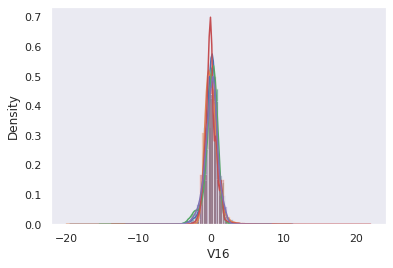

In [ ]:
# plot only non-fraud data
for i, feat in enumerate(features_over_90):
    sns.distplot(X_train[feat][y_train==0], bins=30)

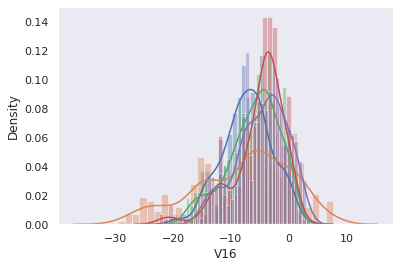

In [ ]:
# plot only fraud data
for i, feat in enumerate(features_over_90):
    sns.distplot(X_train[feat][y_train==1], bins=30)

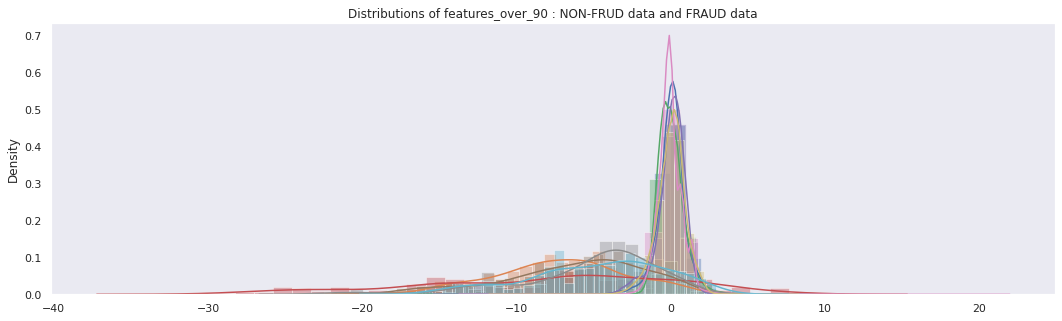

In [ ]:
nplots=np.size(features_over_90)
plt.figure(figsize=(18,nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features_over_90):
    sns.distplot(X_train[feat][y_train==0], bins=30)
    sns.distplot(X_train[feat][y_train==1], bins=30)
    plt.xlabel('')
    plt.title('Distributions of features_over_90 : NON-FRUD data and FRAUD data')

Looking at the supervised plots above, in high level, it looks like there are about 2 to 3 different Gaussians for FRAUD cases that have greater variance than NON-FRAUD cases.

### Plot Features with **AUC >= 0.88** from Part 2

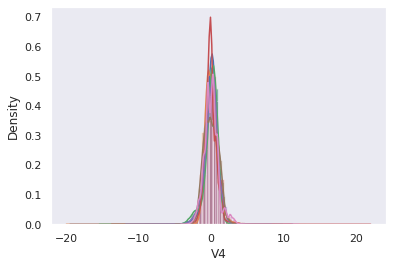

In [ ]:
for i, feat in enumerate(features_over_88):
    sns.distplot(X_train[feat][y_train==0], bins=30)

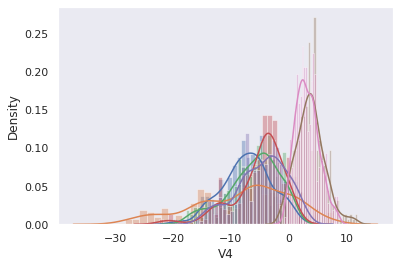

In [ ]:
for i, feat in enumerate(features_over_88):
    sns.distplot(X_train[feat][y_train==1], bins=30)

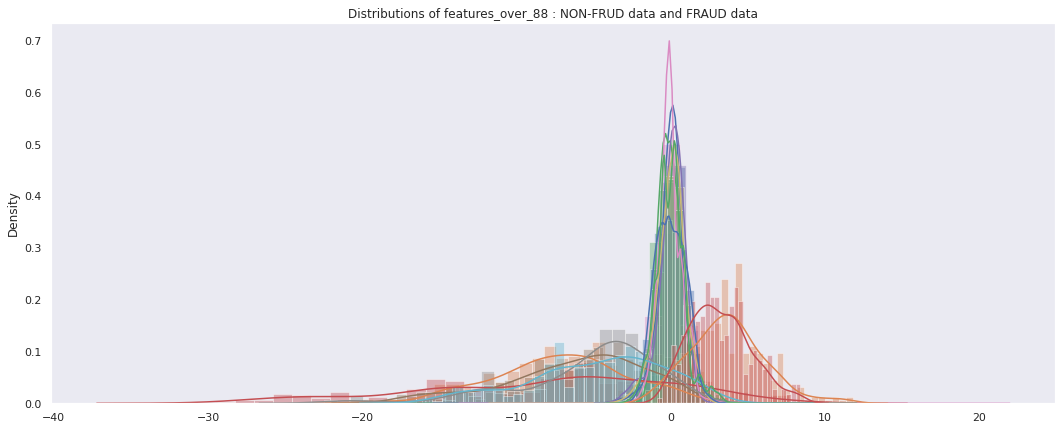

In [ ]:
nplots=np.size(features_over_88)
plt.figure(figsize=(18,nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features_over_88):
    sns.distplot(X_train[feat][y_train==0], bins=30)
    sns.distplot(X_train[feat][y_train==1], bins=30)
    plt.xlabel('')
    plt.title('Distributions of features_over_88 : NON-FRUD data and FRAUD data')

It looks like the FRAUD distributions of `features_over_88` (that have two more features than `features_over_90`) have more distinct number of Gaussians, around three to four, than those of `features_over_90`. The FRAUD cases also have greater variance than NON-FRAUD cases.

### Plot Features with **AUC >= 0.85** from Part 2

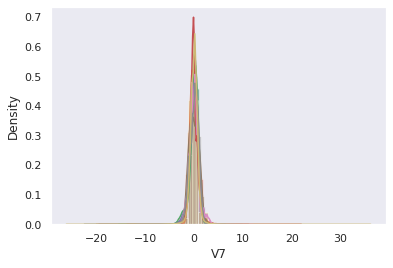

In [ ]:
for i, feat in enumerate(features_over_85):
    sns.distplot(X_train[feat][y_train==0], bins=30)

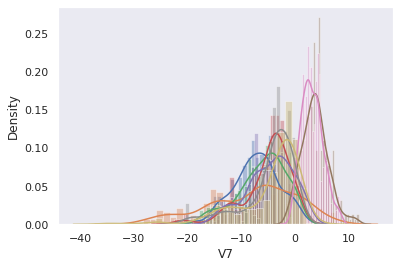

In [ ]:
for i, feat in enumerate(features_over_85):
    sns.distplot(X_train[feat][y_train==1], bins=30)

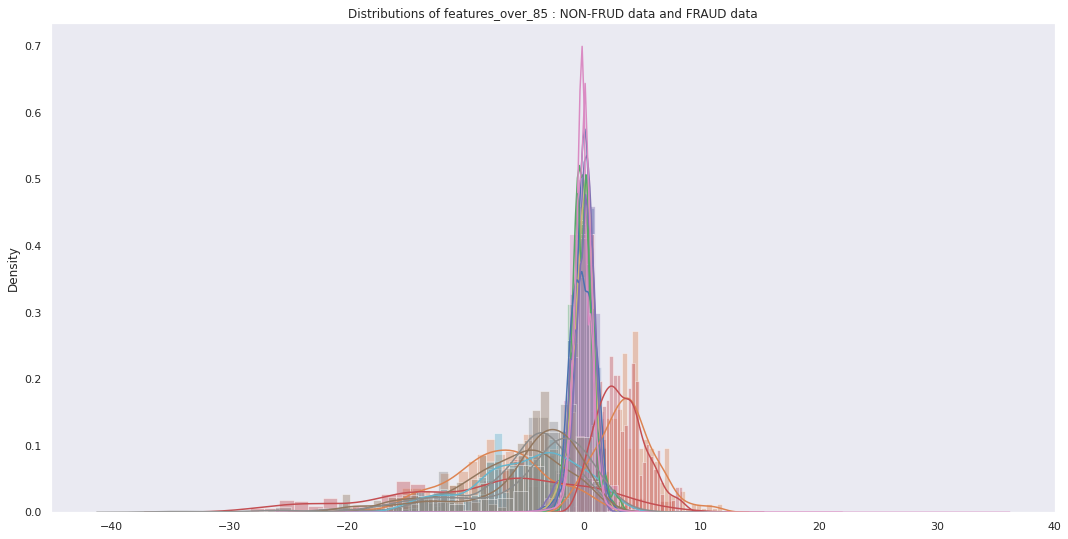

In [ ]:
nplots=np.size(features_over_85)
plt.figure(figsize=(18,nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features_over_85):
    sns.distplot(X_train[feat][y_train==0], bins=30)
    sns.distplot(X_train[feat][y_train==1], bins=30)
    plt.xlabel('')
    plt.title('Distributions of features_over_85 : NON-FRUD data and FRAUD data')

It looks like there are about four to five Gaussians for FRAUD data. But this plot looks a bit more clogged and confusing than the plot with `features_over_90` or `features_over_88`. 

### PLOTS : Summary

**Analysis of the 3 groups of plots above :**

For FRAUD cases only, there were around 2 to 3 Gaussians for using `features_over_90` and 3 to 4 Gaussians using `features_over_88`. For NON-FRAUD cases only, there seemed to be a single skinny Gaussians for both cases. 

However, this is just high-level observation. If I look more closely, for example for non-fraud cases, the high peak actually contains within itself several other peaks that are lower. Thus, it would be wise to try different number of components when modelling non-fraud cases.

Also, there are some overlapping ares between non-fraud and fraud cases (near x-axis=0 at low Density values). Such overlap might result in the misclassifications of data in those area by Gaussian Mixture model.

### Helper Functions for EVALUATION
* show_confusion_matrix
* eval_gm

In [ ]:
y_train.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [ ]:
def show_confusion_matrix(test_preds, test_labels, class2idx={'non-fraud':0, 'fraud':1}):
    '''
    helper function for plotting confusion matrix (in RATIOS) with colorgrid - 
    if we use number of examples for plotting, the color saturates at the number of non-fraud cases 
    (since # of non-fraud cases >> # of fraud cases)
    '''
    n_classes = len(class2idx)
    class_idxs = np.arange(n_classes)
    cm = confusion_matrix(test_labels, test_preds, labels=class_idxs)
    cmDF = pd.DataFrame()
    for i, row in enumerate(class_idxs):
        temp = {}
        for j, col in enumerate(class_idxs): 
            temp[col]=cm[i,j]
        cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))
    print("Confusion Matrix (in number of examples) :")
    print(cm)
    print()
    cm = np.vstack(([np.round(float(v/199019.), decimals=4) for v in cm[0]], [np.round(float(v/345.), decimals=4) for v in cm[1]]))

    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title('Confusion Matrix (in ratios)', fontsize=20)
    plt.colorbar()
    tick_labels = list(class2idx)
    plt.xticks(range(n_classes), tick_labels, rotation=90, fontsize=12)
    plt.yticks(range(n_classes), tick_labels, fontsize=12)
    plt.ylabel('True Label', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=15)

    # fill in the cells w/ numbers
    for i in range(len(cm)):
        for j in range(len(cm[i])):  
            if cm[i][j] < 1:
                color = 'white'
            plt.text(j, i, format(cm[i][j]), horizontalalignment='center', color='black', fontsize=12)

In [ ]:
def eval_gm(gm, scores, y_train):
  '''
  helper function that calculates AUC, best precision, recall, F1-score, and plots confusion matrix
  '''
  auc = roc_auc_score( y_train, 1-scores )  
  best_f1 = 0
  performance_df = pd.DataFrame(columns=['min score', 'max score', 'best threshold', 'best F1 score', 'best precision', 'best recall'])
  for th in np.linspace(min(scores), max(scores), 100):
    preds = scores < th 
    f1 = f1_score( y_train, preds )
    if f1 > best_f1 :
      best_f1 = f1
      best_th = th
      best_p = precision_score( y_train, preds )
      best_r = recall_score( y_train, preds )
  performance_df.loc[0] = [min(scores), max(scores), best_th, best_f1, best_p, best_r]
  print("AUC : {}\n".format(auc))
  display(performance_df)
  print()

  # plot scores
  scores_df = pd.DataFrame()
  scores_df['index'] = np.arange(len(X_train))
  scores_df['target'] = np.array(y_train)
  scores_df['score'] = scores
  lm=sns.lmplot(x='index', y='score', data=scores_df, hue='target', palette='hls', fit_reg=False, scatter_kws={"s": 5})
  fig = lm.fig 
  fig.suptitle('Scores Plot', fontsize=15)

  show_confusion_matrix(scores < best_th, y_train)

  return auc, performance_df

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟙 🌠
Let's try using `features_over_90`, `features_over_88`, and `features_over_85` as features and see how the model performs differently. Let's start with a single-component Gaussian Mixture model.
* Use `features_over_90` (features with AUC>=0.9 from Part 2)
* Supervised
  * Fit the model only with **Non-FRAUD** data
* n_components = 1

AUC : 0.9602647362122806



,min score,max score,best threshold,best F1 score,best precision,best recall
0,-1811.452893,-4.181147,-95.457498,0.744745,0.772586,0.718841



Confusion Matrix (in number of examples) :
[[198946     73]
 [    97    248]]



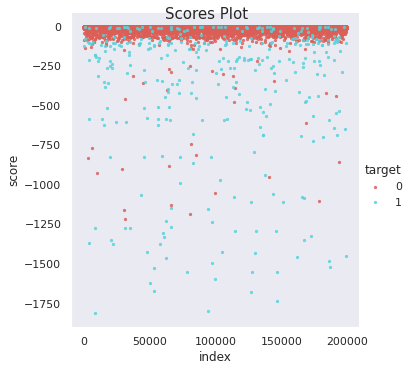

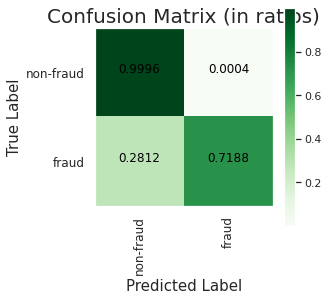

In [ ]:
## 90
gm = GaussianMixture(n_components=1)
gm = gm.fit(X_train[features_over_90][y_train==0])
scores = gm.score_samples(X_train[features_over_90])
auc, performance_df = eval_gm(gm, scores, y_train)

This is an improvement from the best F1-score from Part 4 of 0.6857 (only using V12 feature). 

Looking at the Scores Plot, it looks like the NON-FRAUD & FRAUD points are moderately seperated with majority of NON-FRAUD ones concentrated on top, while FRAUD ones occupy the entire range of the scores.

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝 𝟚 🌠
* Use `features_over_88` (features with AUC>=0.88 from Part 2)
* Supervised
  * Fit the model only with **Non-FRAUD** data
* n_components = 1

AUC : 0.9631805891958025



,min score,max score,best threshold,best F1 score,best precision,best recall
0,-2141.743803,-5.992133,-113.858379,0.766917,0.796875,0.73913



Confusion Matrix (in number of examples) :
[[198954     65]
 [    90    255]]



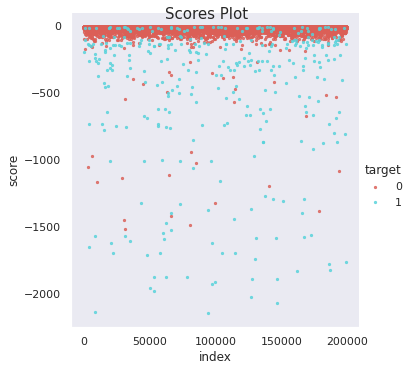

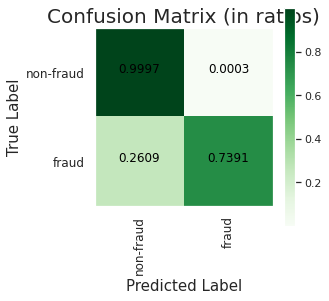

In [ ]:
## 88
gm = GaussianMixture(n_components=1)
gm = gm.fit(X_train[features_over_88][y_train==0])
scores = gm.score_samples(X_train[features_over_88])
auc, performance_df = eval_gm(gm, scores, y_train)

F1-score, Precision, and Recall all improved from using `features_over_90`.

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝 𝟛 🌠
* Use `features_over_85` (features with AUC>=0.85 from Part 2)
* Supervised
  * Fit the model only with **Non-FRAUD** data
* n_components = 1

AUC : 0.9625415561881754



,min score,max score,best threshold,best F1 score,best precision,best recall
0,-3423.580347,-7.682539,-180.20263,0.739766,0.746313,0.733333



Confusion Matrix (in number of examples) :
[[198933     86]
 [    92    253]]



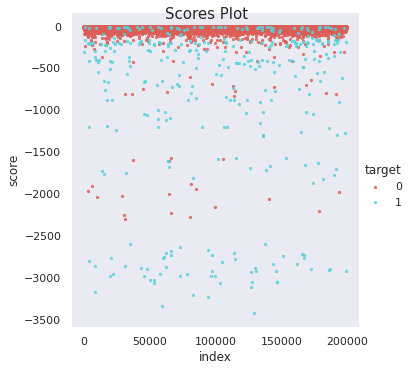

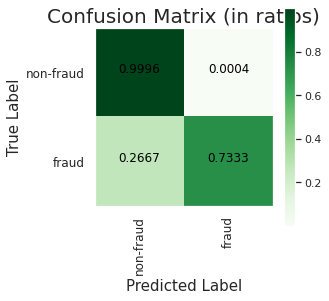

In [ ]:
## 85
gm = GaussianMixture(n_components=1)
gm = gm.fit(X_train[features_over_85][y_train==0])
scores = gm.score_samples(X_train[features_over_85])
auc, performance_df = eval_gm(gm, scores, y_train)

F1-score, Precision, and Recall are all lower than ones from `features_over_90` and `features_over_88`. Thus, I will stop using `features_over_85` for further modelling.

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟜 🌠
`features_over_88` performed the best for supervised model using one component. Now, I will use `features_over_88` with 2 components this time. 
* Use `features_over_88` (features with AUC>=0.88 from Part 2)
* Supervised
  * Fit the model only with **Non-FRAUD** data
* n_components = 2

AUC : 0.9664849419737144



,min score,max score,best threshold,best F1 score,best precision,best recall
0,-590.89803,-4.100408,-39.6639,0.741606,0.747059,0.736232



Confusion Matrix (in number of examples) :
[[198933     86]
 [    91    254]]



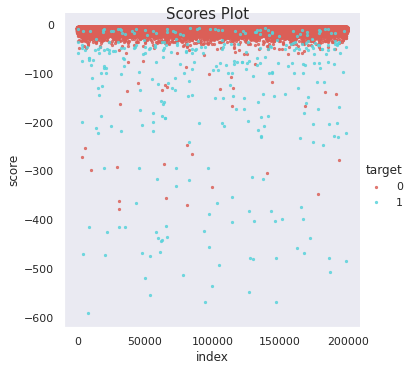

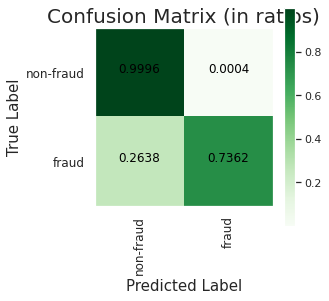

In [ ]:
## 88
gm = GaussianMixture(n_components=2)
gm = gm.fit(X_train[features_over_88][y_train==0])
scores = gm.score_samples(X_train[features_over_88])
auc, performance_df = eval_gm(gm, scores, y_train)

With n_components=2, F1-score, Precision, and Recall are all lower than using n_components=1. This means that more NON-FRAUD cases got misclassified as FRAUD, and more FRAUD cases got misclassified as NON-FRAUD. 

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟝 🌠
Let's see how having 3 components make things different.
* Use `features_over_88` (features with AUC>=88 from Part 2)
* Supervised
  * Fit the model only with **Non-FRAUD** data
* n_components = 3

AUC : 0.9651553915433462



,min score,max score,best threshold,best F1 score,best precision,best recall
0,-320.356667,-3.248974,-28.873838,0.717949,0.705882,0.730435



Confusion Matrix (in number of examples) :
[[198914    105]
 [    93    252]]



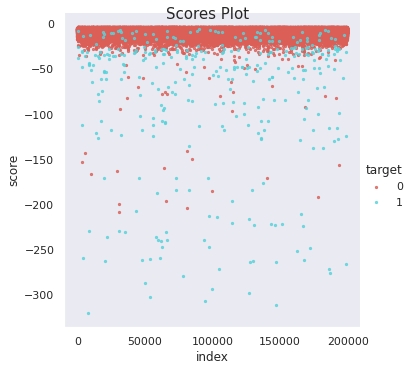

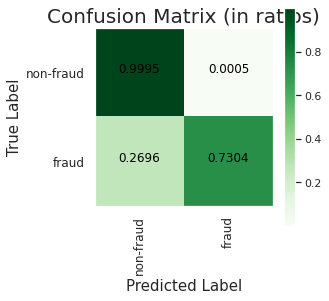

In [ ]:
## 88
gm = GaussianMixture(n_components=3)
gm = gm.fit(X_train[features_over_88][y_train==0])
scores = gm.score_samples(X_train[features_over_88])
auc, performance_df = eval_gm(gm, scores, y_train)

For n_components=2 to n_components=3, I got a similar transition from n_components=1 to n_components=2, with all of F1-score, Precision, and Recall being lower. 

I think a similar phenomenon would happen if I increase the number of components to four, five, etc. So I will stop here for the same approach.

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟞 🌠
Now, I will try the unsupervised approach, by fitting ALL data (both positive and negative) to a Gaussian. 
 
* Use `features_over_88` (features with AUC>=90 from Part 2)
* Unsupervised
  * Fit the model on **ALL** data
* n_components = 1

AUC : 0.9629605970910504



,min score,max score,best threshold,best F1 score,best precision,best recall
0,-860.583076,-6.480473,-92.753463,0.655462,0.78,0.565217



Confusion Matrix (in number of examples) :
[[198964     55]
 [   150    195]]



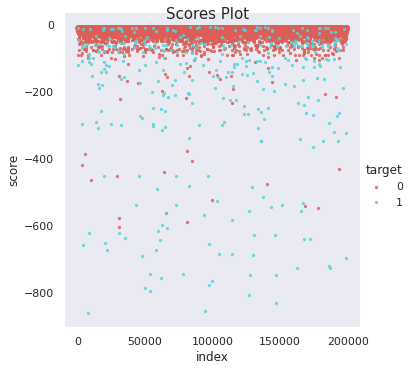

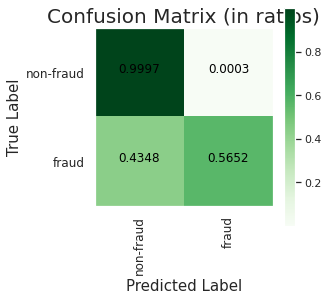

In [ ]:
## 88
gm = GaussianMixture(n_components=1)
gm = gm.fit(X_train[features_over_88])
scores = gm.score_samples(X_train[features_over_88])
auc, performance_df = eval_gm(gm, scores, y_train)

43.5% of FRAUD cases got missclassified as NON-FRAUD, resulting in low Recall. Looking at the Scores Plot, NON-FRAUD cases are concentrated in lower range of scores, but some FRAUD cases are also located there. There is a moderate overlap between NON-FRAUD and FRAUD cases.

Both the Recall and F1-score are much worse than that of the supervised models, Model 1 to 5.

Precision is moderately high, at 0.78, just because there is only 55 out of 199019 NON-FRAUD cases misclassified as FRAUD. 

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟟 🌠
Now, let's try the same thing with Model 6 with 2 components. 
 
* Use `features_over_88` (features with AUC>=90 from Part 2)
* Unsupervised
  * Fit the model on **ALL** data
* n_components = 2

AUC : 0.9656929849607979



,min score,max score,best threshold,best F1 score,best precision,best recall
0,-166.67014,-4.200166,-37.022383,0.535714,0.697674,0.434783



Confusion Matrix (in number of examples) :
[[198954     65]
 [   195    150]]



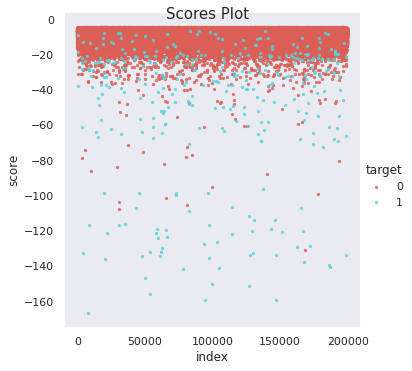

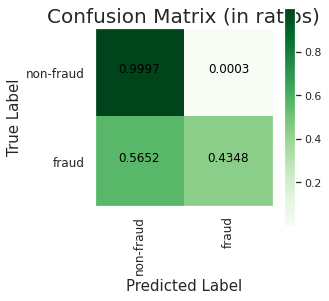

In [ ]:
## 88
gm = GaussianMixture(n_components=2)
gm = gm.fit(X_train[features_over_88])
scores = gm.score_samples(X_train[features_over_88])
auc, performance_df = eval_gm(gm, scores, y_train)

* AUC : 0.9749
* Best F1-score : 0.5567
* Best Recall : 0.5226
* Best Precison : 0.5956	

Having 2 components performed worse than having one component (Model 6). 56.5% of FRAUD cases got missclassified as NON-FRAUD, resulting in even lower Recall. Similarly with Model 6's Scores Plot, there is a moderate overlap between NON-FRAUD and FRAUD cases.

All in all, I don't think unsupervised models perform any better than supervised models (from Models 1 to 5). 

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟠 🌠
Now, as a new approach, I will try **Part 4**'s approach. I will also try using both `features_over_90` and `features_over_88` subsets of features.
 
* Use `features_over_90` and `features_over_88` 
* Supervised
  * Fit 2 separate models, each on **FRAUD** and **NON-FRAUD** data
* n_components = 1 for both models

For this approach, **it is not possible to calculate AUC** since there is no concept of 'threshold' that the score should be less than. We are just comparing two scores from two different Gaussian Mixture models. 


A slightly modified version of `find_optimal_c` function from Part 4 :

(to allow multiple features and calculation of precision & recall)

In [ ]:
def find_optimal_c_PART5(X_train, y_train, feature, n_components_non_fraud=1, n_components_fraud=1):

    ''' 1. Fit GM1 on a feature of NON-FRAUD transactions (y_train = 0) '''
    G1 = GaussianMixture(n_components=n_components_non_fraud, random_state=0)
    if type(feature) == str:  # if only one feature was passed
        G1.fit(np.array(X_train[y_train==0][feature]).reshape(-1, 1))  # fit gm model for a SINGLE feature
    else:
        G1.fit(X_train[y_train==0][feature])

    ''' 2. Fit GM2 on a feature of FRAUD transactions (y_train = 1) ''' 
    G2 = GaussianMixture(n_components=n_components_fraud, random_state=0)
    if type(feature) == str:
        G2.fit(np.array(X_train[y_train==1][feature]).reshape(-1, 1))
    else:
        G2.fit(X_train[y_train==1][feature])

    ''' 3. Compute SCORES for both GM1&GM2 on ENIRE training set '''
    if type(feature) == str:
        S1 = G1.score_samples(np.array(X_train[feature]).reshape(-1, 1))   # log probs of each feature point belonging to NON-FRAUD cases
        S2 = G2.score_samples(np.array(X_train[feature]).reshape(-1, 1))   # log probs of each feature point belonging to FRAUD cases
    else:
        S1 = G1.score_samples(X_train[feature])   
        S2 = G2.score_samples(X_train[feature])

    ''' 4. Find and return the optimal c value ''' 
    min_c, max_c = min(S1/S2), max(S1/S2)                              # if a point's P(not fraud) < c*P(fraud), classify as fraud
    if max_c > min_c:  # if this condition is not met (max_c = min_c), disregard the feature
        max_f1_score = 0
        for c in np.linspace(min_c, max_c, 100):
            if f1_score(y_train, S1 < c*S2) > max_f1_score:
                max_f1_score = f1_score( y_train, S1 < c*S2 ) 
                max_p        = precision_score( y_train, S1 < c*S2 )
                max_r        = recall_score( y_train, S1 < c*S2 )
                best_c       = c
        return best_c, max_f1_score, max_p, max_r

In [ ]:
## 90
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_90, 
                                                          n_components_non_fraud=1, n_components_fraud=1)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 8.0052
Best F1 score : 0.7957
Best Precision : 0.8538
Best Recall: 0.7449


In [ ]:
## 88
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_88, 
                                                          n_components_non_fraud=1, n_components_fraud=1)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 7.0187
Best F1 score : 0.8000
Best Precision : 0.8381
Best Recall: 0.7652


What an improvement! 

This time again, using `features_over_88` performed better than using `features_over_90`. The result with `features_over_88` is highest F1_score, Precision, and Recall obtained so far. 

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟡 🌠
Now, I will keep Part 4's approach while changing around the number of components for both GM models fit on NON-FRAUD & FRAUD data.
 
* Use `features_over_90` and `features_over_88` 
* Supervised
  * Fit 2 separate models, each on FRAUD and NON-FRAUD data
* **n_components = 1** for **NON-FRAUD** model
* **n_components = 2** for **FRAUD** model

In [ ]:
## 90
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_90, 
                                                          n_components_non_fraud=1, n_components_fraud=2)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 7.0959
Best F1 score : 0.8102
Best Precision : 0.8433
Best Recall: 0.7797


In [ ]:
## 88
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_88, 
                                                          n_components_non_fraud=1, n_components_fraud=2)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 7.8025
Best F1 score : 0.8086
Best Precision : 0.8571
Best Recall: 0.7652


This time, using `features_over_90` resulted in higher Recall and F1-score. All three metrics increased by using two components for FRAUD model instead of one!

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟙𝟘 🌠
Still using Part 4 approach.
* Use `features_over_90` and `features_over_88` 
* Supervised
  * Fit 2 separate models, each on FRAUD and NON-FRAUD data
* **n_components = 2** for **NON-FRAUD** model
* **n_components = 2** for **FRAUD** model


In [ ]:
## 90
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_90, 
                                                          n_components_non_fraud=2, n_components_fraud=2)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 3.4716
Best F1 score : 0.7826
Best Precision : 0.7582
Best Recall: 0.8087


In [ ]:
## 88
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_88, 
                                                          n_components_non_fraud=2, n_components_fraud=2)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 3.8934
Best F1 score : 0.8102
Best Precision : 0.8433
Best Recall: 0.7797


For both models using `features_over_90` and `features_over_88`, Recall increased from Model 9.

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟙𝟙 🌠
Still using Part 4 approach.
* Use `features_over_90` and `features_over_88` 
* Supervised
  * Fit 2 separate models, each on FRAUD and NON-FRAUD data
* **n_components = 2** for **NON-FRAUD** model
* **n_components = 3** for **FRAUD** model


In [ ]:
## 90
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_90, 
                                                          n_components_non_fraud=2, n_components_fraud=3)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 3.5310
Best F1 score : 0.7859
Best Precision : 0.7644
Best Recall: 0.8087


In [ ]:
## 88
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_88, 
                                                          n_components_non_fraud=2, n_components_fraud=3)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 4.6803
Best F1 score : 0.7994
Best Precision : 0.8703
Best Recall: 0.7391


Using `features_over_90`, Recall stayed the same while Precision and F1-score increased by a little bit. This means less false alarms.

Using `features_over_88`, Recall decreased by 0.04.

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝  𝟙𝟚 🌠
Still using Part 4 approach.
* Use `features_over_90` and `features_over_88` 
* Supervised
  * Fit 2 separate models, each on FRAUD and NON-FRAUD data
* **n_components = 2** for **NON-FRAUD** model
* **n_components = 4** for **FRAUD** model


In [ ]:
## 90
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_90, 
                                                          n_components_non_fraud=2, n_components_fraud=4)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 3.5713
Best F1 score : 0.7819
Best Precision : 0.7645
Best Recall: 0.8000


In [ ]:
## 88
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_88, 
                                                          n_components_non_fraud=2, n_components_fraud=4)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 4.7221
Best F1 score : 0.7994
Best Precision : 0.8703
Best Recall: 0.7391


Both models did not perform any better than Model 11.

### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟙𝟛 🌠
Still using Part 4 approach.
* Use `features_over_90` and `features_over_88` 
* Supervised
  * Fit 2 separate models, each on FRAUD and NON-FRAUD data
* **n_components = 3** for **NON-FRAUD** model
* **n_components = 3** for **FRAUD** model


In [ ]:
## 90
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_90, 
                                                          n_components_non_fraud=3, n_components_fraud=3)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 2.6442
Best F1 score : 0.7905
Best Precision : 0.8110
Best Recall: 0.7710


In [ ]:
## 88
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_88, 
                                                          n_components_non_fraud=3, n_components_fraud=3)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 2.7327
Best F1 score : 0.7815
Best Precision : 0.7803
Best Recall: 0.7826


### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝   𝟙𝟜 🌠
Still using Part 4 approach.
* Use `features_over_90` and `features_over_88` 
* Supervised
  * Fit 2 separate models, each on FRAUD and NON-FRAUD data
* **n_components = 3** for **NON-FRAUD** model
* **n_components = 2** for **FRAUD** model


In [ ]:
## 90
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_90, 
                                                          n_components_non_fraud=3, n_components_fraud=2)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 2.5928
Best F1 score : 0.7899
Best Precision : 0.8066
Best Recall: 0.7739


In [ ]:
## 88
best_c, max_f1_score, max_p, max_r = find_optimal_c_PART5(X_train, y_train, features_over_88, 
                                                          n_components_non_fraud=3, n_components_fraud=2)
print('Best c : {:.4f}\nBest F1 score : {:.4f}\nBest Precision : {:.4f}\nBest Recall: {:.4f}'.format(best_c, max_f1_score, max_p, max_r))

Best c : 2.3573
Best F1 score : 0.7808
Best Precision : 0.7624
Best Recall: 0.8000


I will now stop the approach of changing around two hyper-parameters (n_components_non_fraud & n_components_fraud) using Part 4's approach. 


### 🌠 𝕄 𝕠 𝕕 𝕖 𝕝 𝕤 - 𝕊 𝕦 𝕞 𝕞 𝕒 𝕣 𝕪 🌠

In [ ]:
models_df = pd.DataFrame(index=range(1,22))
models_df['name'] = ['Model '+str(n) for n in range(1,8)] + ['Model 8-90','Model 8-88','Model 9-90','Model 9-88','Model 10-90','Model 10-88','Model 11-90','Model 11-88','Model 12-90','Model 12-88','Model 13-90','Model 13-88','Model 14-90','Model 14-88']#,'Model 15-90','Model 15-88','Model 16-90','Model 16-88','Model 17-90','Model 17-88']
models_df['F1 score']  = [0.7447, 0.7669, 0.7398, 0.7416, 0.7179, 0.6555, 0.5357, 0.7957, 0.8, 0.8102, 0.8086, 0.7826, 0.8102, 0.7859, 0.7994, 0.7819, 0.7994, 0.7905, 0.7815, 0.7899, 0.7808]    #, 0.7982, 0.7926, 0.7926, 0.7875, 0.7946, 0.7854]
models_df['Recall']    = [0.7188, 0.7391, 0.7333, 0.7362, 0.7304, 0.5652, 0.4348, 0.7449, 0.7652, 0.7797, 0.7652, 0.8087, 0.7797, 0.8087, 0.7391, 0.8, 0.7391, 0.771, 0.7826, 0.7739, 0.8]    #, 0.7793, 0.7693, 0.7722, 0.7776, 0.8075, 0.7710]
models_df['Precision'] = [0.7726, 0.7969, 0.7463, 0.7471, 0.7059, 0.78, 0.6977, 0.8538, 0.8381, 0.8433, 0.8571, 0.7582, 0.8433, 0.7644, 0.8703, 0.7645, 0.8703, 0.811, 0.7803, 0.8066, 0.7624]    #, 0.8012, 0.8195, 0.8154, 0.7997, 0.7834, 0.8025]
models_df

,name,F1 score,Recall,Precision
1,Model 1,0.7447,0.7188,0.7726
2,Model 2,0.7669,0.7391,0.7969
3,Model 3,0.7398,0.7333,0.7463
4,Model 4,0.7416,0.7362,0.7471
5,Model 5,0.7179,0.7304,0.7059
6,Model 6,0.6555,0.5652,0.7800
7,Model 7,0.5357,0.4348,0.6977
8,Model 8-90,0.7957,0.7449,0.8538
9,Model 8-88,0.8000,0.7652,0.8381
10,Model 9-90,0.8102,0.7797,0.8433


`-90` adn `-88` mean using `features_over_90` and `features_over_88`.

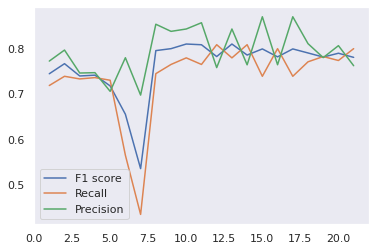

In [ ]:
plt.plot(models_df['F1 score'])
plt.plot(models_df['Recall'])
plt.plot(models_df['Precision'])
plt.legend(['F1 score', 'Recall', 'Precision'])

Let's print the model(s) with maximum F1 score / Recall / Precision.

* **Top 3 Models for F1 score :**

In [ ]:
models_df.sort_values(by='F1 score', ascending=False, ignore_index=True)[['name', 'F1 score']]

,name,F1 score
0,Model 9-90,0.8102
1,Model 10-88,0.8102
2,Model 9-88,0.8086
3,Model 8-88,0.8000
4,Model 12-88,0.7994
5,Model 11-88,0.7994
6,Model 8-90,0.7957
7,Model 13-90,0.7905
8,Model 14-90,0.7899
9,Model 11-90,0.7859


* **Top 3 Models for Recall :**

In [ ]:
models_df.sort_values(by='Recall', ascending=False, ignore_index=True)[['name', 'Recall']]

,name,Recall
0,Model 11-90,0.8087
1,Model 10-90,0.8087
2,Model 14-88,0.8000
3,Model 12-90,0.8000
4,Model 13-88,0.7826
5,Model 9-90,0.7797
6,Model 10-88,0.7797
7,Model 14-90,0.7739
8,Model 13-90,0.7710
9,Model 9-88,0.7652


Model 4 actually predicted ALL examples as FRAUD, so it should be disregarded. 

* **Top 3 Models for Precision :**

In [ ]:
models_df.sort_values(by='Precision', ascending=False, ignore_index=True)[['name', 'Precision']]

,name,Precision
0,Model 12-88,0.8703
1,Model 11-88,0.8703
2,Model 9-88,0.8571
3,Model 8-90,0.8538
4,Model 10-88,0.8433
5,Model 9-90,0.8433
6,Model 8-88,0.8381
7,Model 13-90,0.8110
8,Model 14-90,0.8066
9,Model 2,0.7969


In [ ]:
features_over_90

['V14', 'V17', 'V12', 'V10', 'V16']

In terms of choosing the best model, I will focus more on the **RECALL**. The reason is that as mentioned before, resulting in the least number of False Negatives (FRAUD cases misclassified as NON-FRUAD) is the most important object in this project, as overlooking fraudulent transactions as healthy transactions can lead to a huge financial damage to financial institutions. On the other hand, misclassifying healthy transactions as fraud might cause some inconvenience alarms; however, there will not be too much financial loss compared to the previous case. 

The model with the highest Recall is **Model 11-90** and **Model 10-90** (tied). Since **Model 11-90** has higher Precision and F1-score than Model 10-90, I will use that model. 

**🌠 Best Model : 𝕄 𝕆 𝔻 𝔼 𝕃  𝟙𝟙 - 𝟡𝟘 🌠**
* **Recall · Precision · F1-score** :
  * 0.8078 · 0.7644 · 0.7859
* **Number of features** : 
  * 5
* **Features Used** : 
  * 'V14', 'V17', 'V10', 'V12', 'V16'
  * These are all the features with AUC greater than or equal to 0.9 for unsupervised single component single feature Gaussian model from Part 2.
* **Type** : 
  * Supervised
* **Number of Gaussians** : 
  * 2
  * one for fitting NON-FRAUD examples only
  * one for fitting FRAUD examples only
* **Number of Components** :
  * 2 components for the model that fit NON-FRAUD examples only
  * 3 components for the model that fit FRAUD examples only
  * These numbers match what was observed and described in `Plot Features with AUC >= 0.9 from Part 2` section!


## **Part 6: Evaluating performance on test set** 
Apply the best model.




### 1. Fit GM1 and GM2 from Model 11-90

In [ ]:
G1 = GaussianMixture(n_components=2, random_state=0)
G1.fit(X_train[y_train==0][features_over_90])

G2 = GaussianMixture(n_components=3, random_state=0)
G2.fit(X_train[y_train==1][features_over_90])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

### 2. Scale Test Data with the scaler that was fit on Training Data

In [ ]:
X_test[X_test.columns] = scaler.transform(X_test)
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,0.653088,-0.164828,0.639653,-0.030862,-0.428982,0.921515,-0.068904,0.946131,-0.100925,-0.158665,-1.506003,-1.095880,0.204925,1.147895,-1.883613,-0.270155,-0.069657,0.993118,0.453210,1.039617,0.241451,-0.278545,-0.596281,-0.415414,-0.077669,0.405080,0.017416,0.270599,0.495998,-0.197752
255448,1.314440,-0.178265,0.564331,0.095288,-0.464170,0.855734,-0.551800,0.824504,-0.056988,-0.274310,-1.092389,-0.836978,-0.621052,-0.809012,-0.805670,-0.118409,0.295482,0.577113,-0.177161,-0.182429,-0.125845,-0.365221,-1.145080,-0.047845,0.808980,-0.777496,0.279021,0.191643,0.540396,-0.352239
244749,1.214144,-0.822503,-1.450414,0.216077,0.469115,1.732075,-1.336040,-0.928356,0.273757,0.819951,-0.201657,-1.691352,-0.737771,-1.521003,0.363876,0.044879,0.836176,-1.334296,0.975205,-1.939144,0.544501,0.943459,1.559202,1.534328,1.058356,-3.458332,-2.160503,0.713922,1.346188,0.029794
63919,-0.923637,-1.261746,0.520886,0.951652,0.741142,-1.355353,1.564417,0.417366,-0.199135,-0.236751,0.120500,1.522239,0.438214,-0.337486,0.291376,1.977763,0.091217,0.136186,0.348576,0.129818,-1.282977,1.090085,0.951409,0.239022,-0.431424,0.009186,-0.368903,-1.271775,-2.033406,0.891218
11475,-1.576862,0.681682,-0.328576,0.487186,-0.150377,-0.809902,-0.395534,-0.652956,-0.050887,0.904761,0.102516,0.652504,-3.292392,0.409509,1.308411,-0.948648,0.244603,2.203424,-2.276181,0.323343,-0.165271,-0.187534,-0.102658,0.106991,0.549747,0.726614,-0.557470,-0.006838,0.010024,-0.339968


### 3. Generate Scores on Test Data Using GM1 & GM2

In [ ]:
S1 = G1.score_samples(X_test[features_over_90])   
S2 = G2.score_samples(X_test[features_over_90])

### 4. Make Predictions Using `best c` for Model 11-90

In [ ]:
c = 3.5310
preds = S1 < c*S2

### 5. Evaluate

In [ ]:
print("Test F1-score : {:.4f}, Test Precision : {:.4f}, Test Recall : {:.4f}".format(f1_score(y_test, preds), 
                                                                                     precision_score(y_test, preds),
                                                                                     recall_score(y_test, preds)))

Test F1-score : 0.7930, Test Precision : 0.8188, Test Recall : 0.7687


### 6. Comments

In [ ]:
len(X_test), len(X_test)*0.7687

(85443, 65680.0341)

As expected, test recall is a bit lower than the best train recall of 0.8087. 

Yet, we succeeded in detecting 65,680 fraudulent cases out of 85,443 credit card transactions! 